# Reti Neurali profonde (test di ottimizzatori)

Costruire diverse reti neurali profonde (DDN) con il compito di riconoscere la scrittura manuale delle 10 cifre singole, provando diversi ottimizzatori dalla lista: SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam.

Per la fase di training e di validazione si attinga dalla libreria MNIST importando immagini 28x28 pixel, ed adeguando la forma del vettore/matrice che si propone in input alla rete da sviluppare secondo le caratteristiche dei leyer della rete stessa.

In [1]:

import numpy as np
import tensorflow as tf

np.random.seed(0)
tf.random.set_seed(0)

In [2]:

from tensorflow import keras 
from tensorflow.keras.datasets import mnist


# image dimensions
img_rows, img_cols = 28, 28
# output
num_classes = 10

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# cast floats to single precision
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)


X_train shape: (60000, 28, 28)
Y_train shape: (60000,)

60000 train samples
10000 test samples


Si stabilisce un modello di base della DNN che si vuole costruire:
- 1 layer denso di 400 neuroni con attivazione $relu$;
- 1 layer denso posteriore di sintesi da 100 neuroni con attivazione $relu$;
- 1 leyer opzionale di tipo $Dropout$ per migliorare l'apprendimento;
- 1 leyer denso di 10 neuroni pari al numero di classi che si vogliono classificare con attivazione $softmax$ che restituirà le probabilità per ogni singola classe;
- $Loss \ Function$ di tipo categorizzato $Cross \ entropy$;
- una matrice di valutazione secondo una funzione di accuratezza;


##### - SGD:
Per un primo modello un ottimizzatore $Stochastic \ Gradient \ Descent$.

In [3]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam


modDNN_1= Sequential()
modDNN_1.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
modDNN_1.add(Dense(100, activation='relu'))
modDNN_1.add(Dropout(0.5))
modDNN_1.add(Dense(num_classes, activation='softmax'))

modDNN_1.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=SGD(),
                  metrics=['acc'])
modDNN_1.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 400)               314000    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               40100     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 355,110
Trainable params: 355,110
Non-trainable params: 0
_________________________________________________________________


Avendo a disposizione $60000$ dati di apprendimento e $10000$ di validazione, si stabilisce:
- una $batch \ size$ tale da permettere circa $60$ raggruppamenti ad epoca;
- un numero di epoche massimali pari a $5$ volte la grandezza dei raggruppamenti utilizzati in ogni epoca;
- un rimescolamento dei dati prima dell'inizio di ogni epoca ("shuffle= True");
- l'implementazione di un sistema di early stopping al fine di evitare un apprendimento eccessivo. Si valuta questo sistema secondo l'accuratezza per ogni epoca, desiderando che essa cresca costantemente, con un grado di pazienza di massimo di qualche epoca;

Si opta per un training a numerose epoche e pochi raggruppamenti per epoca per natura stessa dell'ottimizzatore; infatti con un ottimizzatore tipo SGD, poter cambiare spesso (al termine di ogni epoca) il sottogruppo sul quale è calcolato il gradiente stocastico, permette di avere un'elevata molteplicità di gradienti ed evitare al contempo di usare per lungo tempo un medesimo gradiente stocastico che può risultare poco rappresentativo di tutta la popolazione immessa nel training.

In [4]:

batchsize= int(60000/60)
nepochs= 5*batchsize

history = modDNN_1.fit( x= X_train, y= Y_train, batch_size= batchsize, epochs= nepochs, shuffle= True,
          validation_data= ( X_test, Y_test ),
          callbacks= [tf.keras.callbacks.EarlyStopping( monitor= "val_acc", min_delta= 0, patience= 4, 
                     verbose= 0, mode= "max" )]
                   )


Epoch 1/5000
60/60 [==============================] - 2s 35ms/step - loss: 2.1396 - acc: 0.2567 - val_loss: 1.8649 - val_acc: 0.5933
Epoch 2/5000
60/60 [==============================] - 2s 33ms/step - loss: 1.7495 - acc: 0.4971 - val_loss: 1.4686 - val_acc: 0.7395
Epoch 3/5000
60/60 [==============================] - 2s 28ms/step - loss: 1.4371 - acc: 0.6085 - val_loss: 1.1527 - val_acc: 0.7993
Epoch 4/5000
60/60 [==============================] - 2s 29ms/step - loss: 1.2066 - acc: 0.6700 - val_loss: 0.9361 - val_acc: 0.8313
Epoch 5/5000
60/60 [==============================] - 2s 28ms/step - loss: 1.0462 - acc: 0.7098 - val_loss: 0.7908 - val_acc: 0.8509
Epoch 6/5000
60/60 [==============================] - 2s 27ms/step - loss: 0.9376 - acc: 0.7357 - val_loss: 0.6926 - val_acc: 0.8616
Epoch 7/5000
60/60 [==============================] - 2s 38ms/step - loss: 0.8504 - acc: 0.7612 - val_loss: 0.6206 - val_acc: 0.8701
Epoch 8/5000
60/60 [==============================] - 1s 25ms/step - 

60/60 [==============================] - 2s 30ms/step - loss: 0.3228 - acc: 0.9096 - val_loss: 0.2295 - val_acc: 0.9352
Epoch 63/5000
60/60 [==============================] - 2s 33ms/step - loss: 0.3213 - acc: 0.9099 - val_loss: 0.2279 - val_acc: 0.9366
Epoch 64/5000
60/60 [==============================] - 2s 32ms/step - loss: 0.3191 - acc: 0.9099 - val_loss: 0.2265 - val_acc: 0.9364
Epoch 65/5000
60/60 [==============================] - 2s 28ms/step - loss: 0.3151 - acc: 0.9123 - val_loss: 0.2251 - val_acc: 0.9363
Epoch 66/5000
60/60 [==============================] - 2s 32ms/step - loss: 0.3140 - acc: 0.9122 - val_loss: 0.2237 - val_acc: 0.9369
Epoch 67/5000
60/60 [==============================] - 2s 28ms/step - loss: 0.3105 - acc: 0.9133 - val_loss: 0.2224 - val_acc: 0.9369
Epoch 68/5000
60/60 [==============================] - 2s 26ms/step - loss: 0.3084 - acc: 0.9133 - val_loss: 0.2209 - val_acc: 0.9373
Epoch 69/5000
60/60 [==============================] - 2s 28ms/step - loss: 

60/60 [==============================] - 2s 31ms/step - loss: 0.2356 - acc: 0.9341 - val_loss: 0.1709 - val_acc: 0.9488
Epoch 124/5000
60/60 [==============================] - 2s 30ms/step - loss: 0.2343 - acc: 0.9354 - val_loss: 0.1700 - val_acc: 0.9486
Epoch 125/5000
60/60 [==============================] - 2s 30ms/step - loss: 0.2341 - acc: 0.9344 - val_loss: 0.1694 - val_acc: 0.9490
Epoch 126/5000
60/60 [==============================] - 2s 27ms/step - loss: 0.2346 - acc: 0.9343 - val_loss: 0.1687 - val_acc: 0.9489
Epoch 127/5000
60/60 [==============================] - 2s 29ms/step - loss: 0.2309 - acc: 0.9354 - val_loss: 0.1681 - val_acc: 0.9495
Epoch 128/5000
60/60 [==============================] - 2s 32ms/step - loss: 0.2288 - acc: 0.9366 - val_loss: 0.1672 - val_acc: 0.9497
Epoch 129/5000
60/60 [==============================] - 2s 27ms/step - loss: 0.2325 - acc: 0.9348 - val_loss: 0.1669 - val_acc: 0.9497
Epoch 130/5000
60/60 [==============================] - 2s 29ms/step -

Si grafica quindi la funzione obiettivo e l'accuratezza della rete appena allenata.

Validazione:
Test loss --> 0.15884362161159515
Test accuracy --> 0.9514999985694885


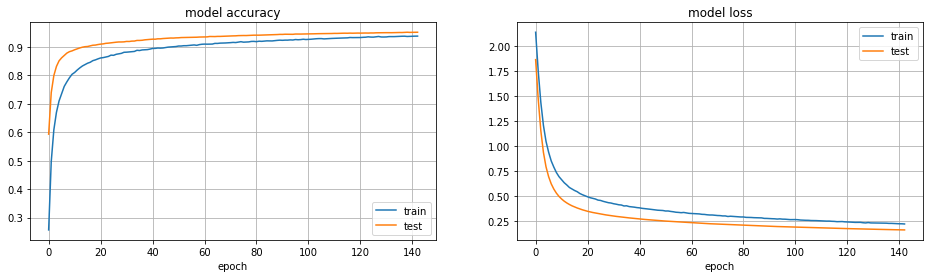

In [5]:

import matplotlib.pyplot as plt


# evaluate model + print performance
score = modDNN_1.evaluate(X_test, Y_test, verbose=0)

print('Validazione:')
print('Test loss -->', score[0])
print('Test accuracy -->', score[1])


fig, axs = plt.subplots(1, 2, figsize=(16, 4))

axs[0].plot(history.history['acc'])
axs[0].plot(history.history['val_acc'])
axs[0].set( xlabel= 'epoch' )
axs[0].set_title( "model accuracy" )
axs[0].legend(['train', 'test'], loc='best')
axs[0].grid(True)

axs[1].plot(history.history['loss'])
axs[1].plot(history.history['val_loss'])
axs[1].set( xlabel= 'epoch' )
axs[1].set_title( "model loss" )
axs[1].legend(['train', 'test'], loc='best')
axs[1].grid(True)

plt.show()


Si impronta un piccolo test su una ventina di immagini prese a campione tra quelle di test.

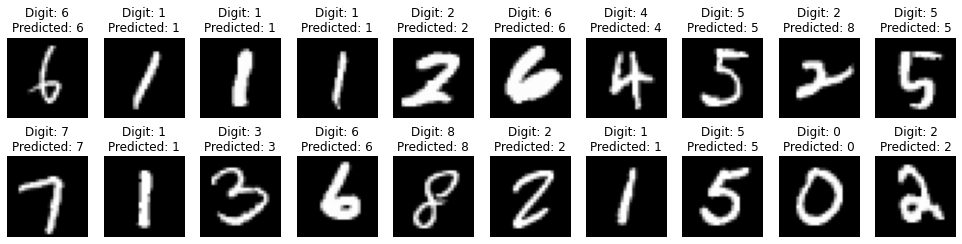

In [6]:

X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = modDNN_1.predict(X_test)
X_test= X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(17, 4)) 
for i in range(20):    
    j= np.random.randint(0,10000)
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[j, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[j]), np.argmax(predictions[j])))    
    plt.axis('off') 
plt.show()


##### - Adam:
Si sostituisce l'ottimizzatore con un ottimizzatore $Adam$, lasciando invariato tutto il resto della rete così da valutare esclusivamente le differenze tra i due ottimizzatori scelti.

In [7]:

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# cast floats to single precision
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)


In [8]:

modDNN_2= Sequential()
modDNN_2.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
modDNN_2.add(Dense(100, activation='relu'))
modDNN_2.add(Dropout(0.5))
modDNN_2.add(Dense(num_classes, activation='softmax'))

modDNN_2.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer= Adam(),
                  metrics=['acc'])
modDNN_2.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 400)               314000    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               40100     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 355,110
Trainable params: 355,110
Non-trainable params: 0
_________________________________________________________________


Secondo le medesime regole e motivazioni definite in precedenza si allena questa seconda rete DNN.

In [9]:

history = modDNN_2.fit( x= X_train, y= Y_train, batch_size= batchsize, epochs= nepochs, shuffle= True,
          validation_data= ( X_test, Y_test ),
          callbacks= [tf.keras.callbacks.EarlyStopping( monitor= "val_acc", min_delta= 0, patience= 4, 
                     verbose= 0, mode= "max" )]
                   )     


Epoch 1/5000
60/60 [==============================] - 2s 31ms/step - loss: 0.7479 - acc: 0.7717 - val_loss: 0.2434 - val_acc: 0.9305
Epoch 2/5000
60/60 [==============================] - 2s 30ms/step - loss: 0.2861 - acc: 0.9180 - val_loss: 0.1718 - val_acc: 0.9487
Epoch 3/5000
60/60 [==============================] - 2s 34ms/step - loss: 0.2061 - acc: 0.9415 - val_loss: 0.1316 - val_acc: 0.9587
Epoch 4/5000
60/60 [==============================] - 2s 28ms/step - loss: 0.1617 - acc: 0.9541 - val_loss: 0.1146 - val_acc: 0.9649
Epoch 5/5000
60/60 [==============================] - 2s 32ms/step - loss: 0.1323 - acc: 0.9622 - val_loss: 0.0997 - val_acc: 0.9702
Epoch 6/5000
60/60 [==============================] - 2s 33ms/step - loss: 0.1109 - acc: 0.9676 - val_loss: 0.0909 - val_acc: 0.9731
Epoch 7/5000
60/60 [==============================] - 2s 29ms/step - loss: 0.0972 - acc: 0.9723 - val_loss: 0.0829 - val_acc: 0.9741
Epoch 8/5000
60/60 [==============================] - 2s 27ms/step - 

Validazione:
Test loss --> 0.0686439722776413
Test accuracy --> 0.9824000000953674


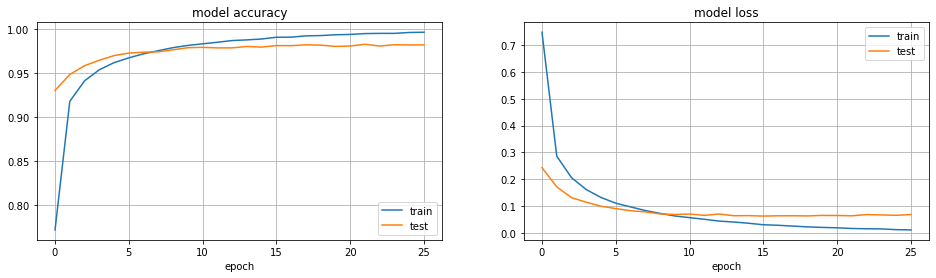

In [10]:
# evaluate model + print performance
score = modDNN_2.evaluate(X_test, Y_test, verbose=0)

print('Validazione:')
print('Test loss -->', score[0])
print('Test accuracy -->', score[1])


fig, axs = plt.subplots(1, 2, figsize=(16, 4))

axs[0].plot(history.history['acc'])
axs[0].plot(history.history['val_acc'])
axs[0].set( xlabel= 'epoch' )
axs[0].set_title( "model accuracy" )
axs[0].legend(['train', 'test'], loc='best')
axs[0].grid(True)

axs[1].plot(history.history['loss'])
axs[1].plot(history.history['val_loss'])
axs[1].set( xlabel= 'epoch' )
axs[1].set_title( "model loss" )
axs[1].legend(['train', 'test'], loc='best')
axs[1].grid(True)

plt.show()


Si valuta nuovamente la rete con una ventina di immagini casuali.

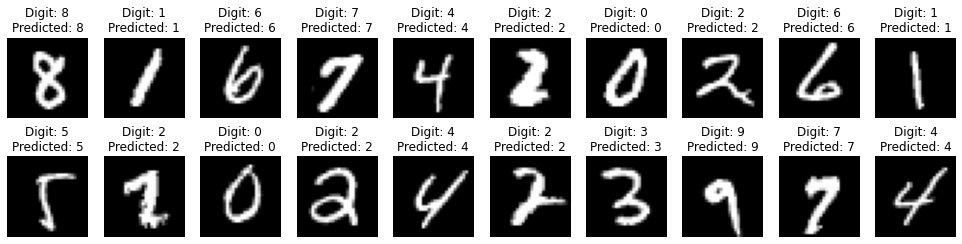

In [11]:

X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = modDNN_2.predict(X_test)
X_test= X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(17, 4)) 
for i in range(20):    
    j= np.random.randint(0,10000)
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[j, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[j]), np.argmax(predictions[j])))    
    plt.axis('off') 
plt.show()


##### - RMSprop:
Si prova un terzo ottimizzatore RMSprop.

In [12]:

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# cast floats to single precision
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)


In [13]:

modDNN_3= Sequential()
modDNN_3.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
modDNN_3.add(Dense(100, activation='relu'))
modDNN_3.add(Dropout(0.5))
modDNN_3.add(Dense(num_classes, activation='softmax'))

modDNN_3.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer= RMSprop(),
                  metrics=['acc'])
modDNN_3.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 400)               314000    
_________________________________________________________________
dense_7 (Dense)              (None, 100)               40100     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1010      
Total params: 355,110
Trainable params: 355,110
Non-trainable params: 0
_________________________________________________________________


Si allena la rete.

In [14]:

history = modDNN_3.fit( x= X_train, y= Y_train, batch_size= batchsize, epochs= nepochs, shuffle= True,
          validation_data= ( X_test, Y_test ),
          callbacks= [tf.keras.callbacks.EarlyStopping( monitor= "val_acc", min_delta= 0, patience= 4, 
                     verbose= 0, mode= "max" )]
                   )

Epoch 1/5000
60/60 [==============================] - 2s 32ms/step - loss: 0.6583 - acc: 0.8029 - val_loss: 0.2699 - val_acc: 0.9185
Epoch 2/5000
60/60 [==============================] - 2s 27ms/step - loss: 0.2895 - acc: 0.9180 - val_loss: 0.1798 - val_acc: 0.9437
Epoch 3/5000
60/60 [==============================] - 2s 27ms/step - loss: 0.2056 - acc: 0.9407 - val_loss: 0.1257 - val_acc: 0.9617
Epoch 4/5000
60/60 [==============================] - 2s 32ms/step - loss: 0.1543 - acc: 0.9553 - val_loss: 0.1154 - val_acc: 0.9645
Epoch 5/5000
60/60 [==============================] - 2s 30ms/step - loss: 0.1262 - acc: 0.9637 - val_loss: 0.0920 - val_acc: 0.9710
Epoch 6/5000
60/60 [==============================] - 2s 26ms/step - loss: 0.1047 - acc: 0.9697 - val_loss: 0.0808 - val_acc: 0.9756
Epoch 7/5000
60/60 [==============================] - 2s 32ms/step - loss: 0.0880 - acc: 0.9737 - val_loss: 0.0869 - val_acc: 0.9717
Epoch 8/5000
60/60 [==============================] - 2s 33ms/step - 

Si valuta la rete.

Validazione:
Test loss --> 0.07160405814647675
Test accuracy --> 0.9828000068664551


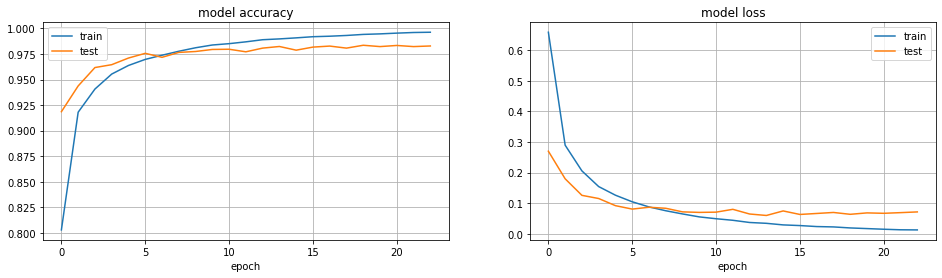

In [15]:

# evaluate model + print performance
score = modDNN_3.evaluate(X_test, Y_test, verbose=0)

print('Validazione:')
print('Test loss -->', score[0])
print('Test accuracy -->', score[1])


fig, axs = plt.subplots(1, 2, figsize=(16, 4))

axs[0].plot(history.history['acc'])
axs[0].plot(history.history['val_acc'])
axs[0].set( xlabel= 'epoch' )
axs[0].set_title( "model accuracy" )
axs[0].legend(['train', 'test'], loc='best')
axs[0].grid(True)

axs[1].plot(history.history['loss'])
axs[1].plot(history.history['val_loss'])
axs[1].set( xlabel= 'epoch' )
axs[1].set_title( "model loss" )
axs[1].legend(['train', 'test'], loc='best')
axs[1].grid(True)

plt.show()


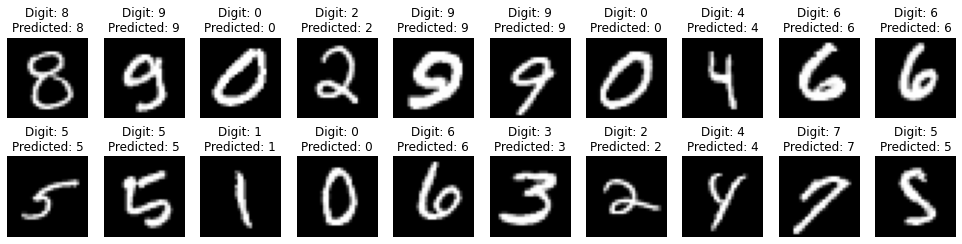

In [16]:

X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = modDNN_3.predict(X_test)
X_test= X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(17, 4)) 
for i in range(20):    
    j= np.random.randint(0,10000)
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[j, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[j]), np.argmax(predictions[j])))    
    plt.axis('off') 
plt.show()


### - Note e Commenti:

Tutte le reti costruite (modDNN_1, modDNN_2 e moodDNN_3) hanno riportato un'elevata efficienza superiore al 90%, tuttavia si sono rivelate estremamente dispendiose dal punto di vista computazionale, necessitando di ottimizzare oltre 300'000 parametri.

La variazione degli ottimizzatori ha permesso di incrementare le prestazioni (in termini di accuratezza) e di diminuire il tempo di training.

Infine, si sottolinea il motivo per il quale si è deciso di valutare le reti e di fermarne il training in base all'accuratezza e non alla $Loss \ Function$.\
In generale avviene ciò che in gergo si chiama "overfitting" nel momento in cui la rete smette di impostare un modello sulla generalità dei dati ed inizia a correre dietro alle variazioni particolari e stocastiche dei singoli dati riconoscendo quindi anch'esse come caratteristiche globali.\
In questa situazione la $Loss \ Function$ del gruppo di dati di training continua a decrescere, mentre quella del gruppo dei dati di validazione presenta un minimo e una conseguente variazione della monotonia. Pertanto si identifica spesso un punto di early-stop grazie a questa inversione di monotonia.\
Tuttavia in una rete con lo scopo come quello descritto, si è preferito identificare un punto di early-stop tramite la funzione di accuratezza al fine di non sprecare eccessivamente tempo ad allenare una rete che è ormai giunta a saturazione delle proprie capacità predittive. In ogni caso, se si osserva la coppia di grafici affiancati di accuratezza e dell'andamento della funzione obiettivo si può notare che nel memento in cui si è interrotto l'allenamento si era giunti nei pressi di uno stazionamento della $Loss \ Function$ e di lì a poco si sarebbe osservato un cambio di monotonia.  

### -----------------------------------------------------------------------------------------------------------------------------------------------------------

# Reti neurali Convoluzionali:

A seguito dell'esperienza precedentemente maturata si utilizzino dei layer differenti al fine di costruire una rete neurale convoluzionale con lo stesso scopo delle precedenti DNN, osservando l'azione e le prestazioni di questo nuovo tipo di rete.

In [17]:

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# cast floats to single precision
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)


Al fine di costruire una rete neurale convoluzionale si utilizzano ora alcuni nuovi tipi di layer:
- layer convoluzionale: in grado di operare sui dati di input al layer con una serie di filtri di dimensioni variabili e di locazione variabile, al fine di mescolare l'informazione ricevuta dando profondità alla rete e permettendo di evidenziare delle proprietà locali dei dati analizzati.
- layer di pooling: in grado di operare un riscalamento e un accorpamento dei dati ottenuti, sempre con il fine di evidenziare proprietà locali degli stessi. In particolare si è qui utilizzato un layer tipo MAXpooling, che opera su un insieme di dati definiti dall'utente e li accorpa assegnando al suo output il valore massimo tra quelli presenti nell'insieme desiderato;
- layer flatten: da intendersi come un connettore tra i layer sopra descritti e quelli sequenziali densi.

Importante, inoltre, sottolineare come vari, rispetto alle DNN costruite fin ora, la tipologia di dati in input ai leyer convoluzionali sopra descritti.\
Un layer sequenziale denso, infatti, accetta in input un vettore di dati monodimensionale; un layer convoluzionale agisce invece su dei dati in forma matriciale, ai quali è quindi più facile ed efficace applicare dei filtri interpretando questi come una maschera matriciale oppure effettuare un'operazione di comunione (pooling) riducendo le dimensioni della matrice di dati desiderata ad una taglia inferiore.

Per la costruzione della rete si è fatto quindi uso di tutto il materiale descritto, con l'aggiunta ulteriore di alcuni layer di "dropout" per un miglior training della rete stessa.\
Per quanto riguarda la sezione sequenziale della rete si è utilizzato (come in un esercizio precedente) due doppi layer 128-32 (con attivazione $sigmoid$, $relu$) con l'intento di far sintetizzare al secondo il massiccio lavoro del primo. In conclusione è presente un layer di neuroni pari al numero di categorie che si vuol fare riconoscere alla rete con attivazione $softmax$ che restituiscono una probabilità di categoria.

Come ottimizzatore si è scelto $Adam$ che ben si è comportato in precedenza.

In [18]:

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten


if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
modCNN = Sequential()
modCNN.add( Conv2D(9, kernel_size=(5, 5), activation='relu', input_shape=input_shape) )
modCNN.add( MaxPooling2D(pool_size=(2, 2)) )
modCNN.add(Dropout(0.25))
modCNN.add( Conv2D(9, kernel_size=(5, 5), activation='relu') )
modCNN.add( MaxPooling2D(pool_size=(2, 2)) )
modCNN.add( Flatten() )
modCNN.add( Dense(128, activation='sigmoid') )
modCNN.add( Dense(32, activation='relu') )
modCNN.add(Dropout(0.5))
modCNN.add( Dense(128, activation='sigmoid') )
modCNN.add( Dense(32, activation='relu') )
modCNN.add( Dense(num_classes, activation='softmax') )
    
modCNN.compile(loss=keras.losses.categorical_crossentropy,
               optimizer= Adam(),
               metrics=['acc'])
modCNN.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 9)         234       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 9)         0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 12, 9)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 9)           2034      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 9)           0         
_________________________________________________________________
flatten (Flatten)            (None, 144)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)              

Si allena la rete con gli stessi parametri usati in precedenza.

In [19]:

history = modCNN.fit(X_train, Y_train,
          batch_size= batchsize, epochs= nepochs, shuffle=True, verbose= 1, validation_data= (X_test, Y_test),
          callbacks= [tf.keras.callbacks.EarlyStopping(monitor="val_acc", min_delta=0, patience=4, verbose=0,
                      mode="max")])  


Epoch 1/5000
60/60 [==============================] - 10s 174ms/step - loss: 2.2241 - acc: 0.1764 - val_loss: 1.8099 - val_acc: 0.3955
Epoch 2/5000
60/60 [==============================] - 11s 180ms/step - loss: 1.4138 - acc: 0.5284 - val_loss: 0.7902 - val_acc: 0.8045
Epoch 3/5000
60/60 [==============================] - 10s 173ms/step - loss: 0.8547 - acc: 0.7370 - val_loss: 0.4599 - val_acc: 0.8843
Epoch 4/5000
60/60 [==============================] - 11s 180ms/step - loss: 0.6351 - acc: 0.8099 - val_loss: 0.3165 - val_acc: 0.9183
Epoch 5/5000
60/60 [==============================] - 10s 174ms/step - loss: 0.5074 - acc: 0.8516 - val_loss: 0.2412 - val_acc: 0.9351
Epoch 6/5000
60/60 [==============================] - 11s 182ms/step - loss: 0.4364 - acc: 0.8731 - val_loss: 0.1992 - val_acc: 0.9450
Epoch 7/5000
60/60 [==============================] - 11s 177ms/step - loss: 0.3798 - acc: 0.8915 - val_loss: 0.1745 - val_acc: 0.9521
Epoch 8/5000
60/60 [==============================] - 1

Si valuta la rete.

Validazione:
Test loss --> 0.09040588140487671
Test accuracy --> 0.9764999747276306


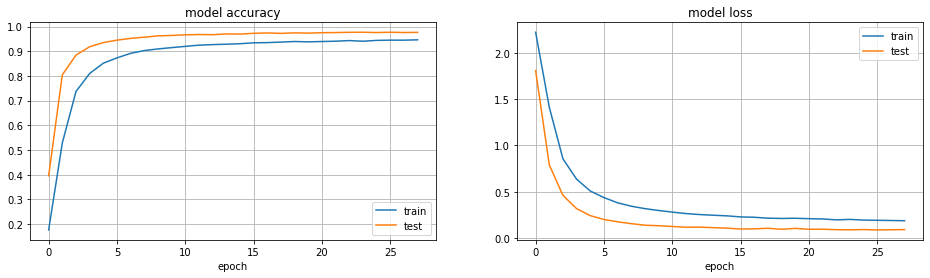

In [20]:

# evaluate model + print performance
score = modCNN.evaluate(X_test, Y_test, verbose=0)

print('Validazione:')
print('Test loss -->', score[0])
print('Test accuracy -->', score[1])


fig, axs = plt.subplots(1, 2, figsize=(16, 4))

axs[0].plot(history.history['acc'])
axs[0].plot(history.history['val_acc'])
axs[0].set( xlabel= 'epoch' )
axs[0].set_title( "model accuracy" )
axs[0].legend(['train', 'test'], loc='best')
axs[0].grid(True)

axs[1].plot(history.history['loss'])
axs[1].plot(history.history['val_loss'])
axs[1].set( xlabel= 'epoch' )
axs[1].set_title( "model loss" )
axs[1].legend(['train', 'test'], loc='best')
axs[1].grid(True)

plt.show()


Si mostra il comportamento della rete.


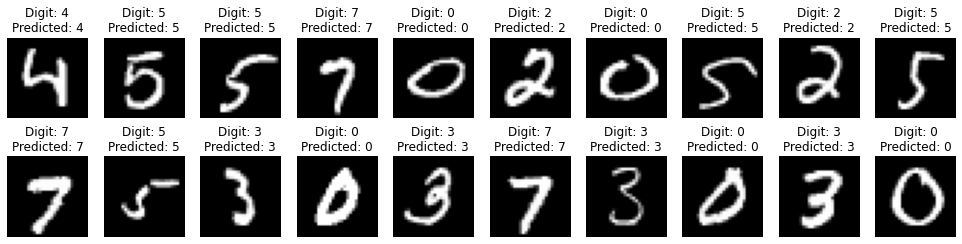

In [21]:

predictions = modCNN.predict(X_test)
X_test= X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(17, 4)) 
for i in range(20):    
    j= np.random.randint(0,10000)
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[j, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[j]), np.argmax(predictions[j])))    
    plt.axis('off') 
plt.show()


### -----------------------------------------------------------------------------------------------------------------------------------------------------------

# - Test personale delle reti

Si testino manualmente le reti costruite con alcune immagini prodotte autonomamente.

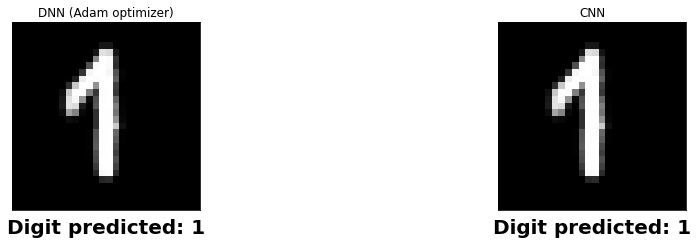

In [22]:

from PIL import Image
import os

num= np.random.randint(0,10)
filename= str(num) + ".png"
image_in = Image.open(filename).convert('L')

ydim, xdim = image_in.size
pix=image_in.load();
data = np.zeros((xdim, ydim))
for j in range(ydim):
    for i in range(xdim):
        data[i,j]=pix[j,i]

data /= 255
data= data.reshape(1,xdim*ydim)
pred= modDNN_2.predict(data)
data = data.reshape(xdim,ydim)

fig, axs = plt.subplots(1, 2, figsize=(17, 3.5))
axs[0].imshow(data, cmap= 'gray')
axs[0].set_title( "DNN (Adam optimizer)" )
axs[0].set_xlabel( "Digit predicted: {}".format(np.argmax(pred)), fontsize= 20, fontweight='bold' )
axs[0].tick_params(axis='both', which='both', length=0)
axs[0].set( xticklabels= "", yticklabels= "" )

if keras.backend.image_data_format() == 'channels_first':
    data = data.reshape(1, 1, img_rows, img_cols)
else:
    data = data.reshape(1, img_rows, img_cols, 1)   
pred= modCNN.predict(data)
data = data.reshape(xdim,ydim)

axs[1].imshow(data, cmap= 'gray')
axs[1].set_title( "CNN" )
axs[1].set_xlabel( "Digit predicted: {}".format(np.argmax(pred)), fontsize= 20, fontweight='bold' )
axs[1].tick_params(axis='both', which='both', length=0)
axs[1].set( xticklabels= "", yticklabels= "" )

plt.tight_layout()
plt.show()


### - Osservazioni:

Le reti DNN sono decisamente più compatte in termini di layer, sebbene più dispendiose in termini di neuroni per layer. Ciò significa che hanno un training più rapido, sebbene necessito di un numero di parametri enorme (300'000+).\
Le reti CNN, più compatte ma più profonde come numero di layer, necessitano un training più corposo, ma il numero assai ridotto di parametri ($\sim$ 35'000) le rende assai competitive e con precisioni più elevate, dove invece le reti DNN plafonano in accuratezza rendendo anche inutile continuare ad allenarle.